<a href="https://colab.research.google.com/github/yibesh/DeepLearning/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ============================================================
# Multi-Layer Perceptron (MLP) with Sequential API (TensorFlow/Keras)
# ============================================================


In [3]:
# --- 1. Imports ---
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# --- 2. Configuration ---
LEARNING_RATE = 0.001
BATCH_SIZE = 32
EPOCHS = 20
DROPOUT_RATE = 0.3
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [5]:
# --- 3. Example Dataset (sensor-like synthetic data) ---
X = np.random.rand(1000, 20).astype(np.float32)   # 1000 samples, 20 features
y = np.random.randint(0, 2, size=(1000,))         # Binary classification (0/1)

In [6]:
# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=[f"Sensor_{i+1}" for i in range(X.shape[1])])
df["Label"] = y

In [7]:
# Display first 10 rows
print("Sample of generated dataset:")
display(df.head(10))  # works in Jupyter

Sample of generated dataset:


,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Label
0,0.374540,0.950714,0.731994,0.598659,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,1
1,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,...,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,1
2,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,...,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,0.325330,1
3,0.388677,0.271349,0.828737,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,...,0.198716,0.005522,0.815461,0.706857,0.729007,0.771270,0.074045,0.358466,0.115869,0
4,0.863103,0.623298,0.330898,0.063558,0.310982,0.325183,0.729606,0.637557,0.887213,0.472215,...,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891,0
5,0.031429,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.076980,...,0.161221,0.929698,0.808120,0.633404,0.871461,0.803672,0.186570,0.892559,0.539342,0
6,0.807440,0.896091,0.318003,0.110052,0.227935,0.427108,0.818015,0.860731,0.006952,0.510747,...,0.222108,0.119865,0.337615,0.942910,0.323203,0.518791,0.703019,0.363630,0.971782,1
7,0.962447,0.251782,0.497249,0.300878,0.284840,0.036887,0.609564,0.502679,0.051479,0.278646,...,0.239562,0.144895,0.489453,0.985650,0.242055,0.672136,0.761620,0.237638,0.728216,0
8,0.367783,0.632306,0.633530,0.535775,0.090290,0.835302,0.320780,0.186519,0.040775,0.590893,...,0.016588,0.512093,0.226496,0.645173,0.174366,0.690938,0.386735,0.936730,0.137521,1
9,0.341066,0.113474,0.924694,0.877339,0.257942,0.659984,0.817222,0.555201,0.529651,0.241852,...,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876,0


In [8]:
# Save dataset to CSV
df.to_csv("sensor_dataset.csv", index=False)
print("✅ Dataset saved as 'sensor_dataset.csv'")

✅ Dataset saved as 'sensor_dataset.csv'


In [9]:
# --- 4. Train/Val/Test split ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=SEED)

In [10]:
# --- 5. Build MLP Model with Sequential API ---
model = Sequential([
    Dense(64, activation="relu", input_shape=(X.shape[1],)),  # input layer + hidden
    Dropout(DROPOUT_RATE),
    Dense(64, activation="relu"),                             # hidden
    Dropout(DROPOUT_RATE),
    Dense(2, activation="softmax")                            # output (2 classes)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
# Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,634 (22.01 KB)

 Trainable params: 5,634 (22.01 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# --- 6. Train Model ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4996 - loss: 0.7205 - val_accuracy: 0.5000 - val_loss: 0.7073
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5130 - loss: 0.7059 - val_accuracy: 0.4800 - val_loss: 0.7020
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5850 - loss: 0.6713 - val_accuracy: 0.4800 - val_loss: 0.7008
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5199 - loss: 0.7014 - val_accuracy: 0.4667 - val_loss: 0.6992
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5462 - loss: 0.6893 - val_accuracy: 0.4933 - val_loss: 0.6956
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5697 - loss: 0.6815 - val_accuracy: 0.5267 - val_loss: 0.6949
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5288 - loss: 0.6900 - val_accuracy: 0.5133 - val_loss: 0.6934
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5449 - loss: 0.6819 - val_accuracy: 0.5200 - val_loss

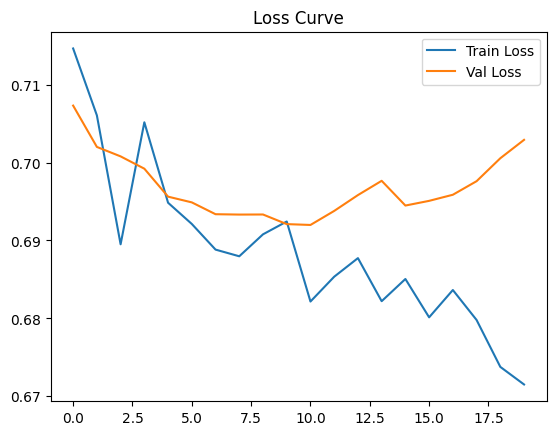

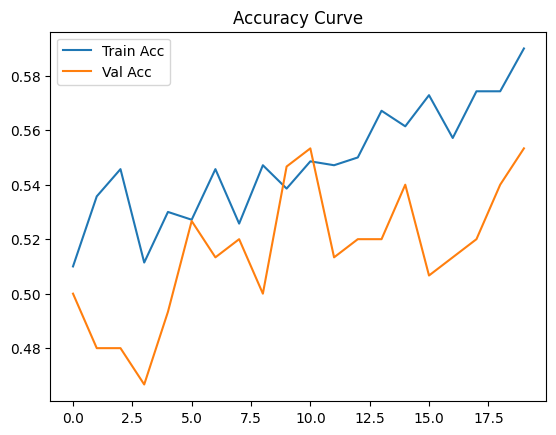

In [14]:
# --- 7. Plot Training Results ---
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

In [15]:
# --- 8. Evaluate on Test Set ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc:.4f}")

✅ Test Accuracy: 0.4600
